<a href="https://colab.research.google.com/github/benmancilla/EDA_FundamentosML_BenjaminMancilla/blob/Revision/Revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos las librerías necesarias para el análisis de datos.

In [44]:
import numpy as np # Programación vectorial
import matplotlib.pyplot as plt # Visualización
import pandas as pd # Estructura y manipulación de datos
import seaborn as sns
from scipy import stats
import warnings
from scipy.stats import pearsonr
warnings.filterwarnings('ignore')

Subimos el data center.

In [4]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
data = pd.read_csv(name, sep=",", encoding='latin-1') # Changed encoding to 'latin-1'

data.head()

Saving data.csv.zip to data.csv.zip


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Exploracion inicial de datos

In [5]:
#información general
print("\nInformación general del dataset:")
data.info()
# Descripción estadística básica
print("\nEstadísticas descriptivas básicas:")
data.describe()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB

Estadísticas descriptivas básicas:


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Buscamos datos nulos

In [6]:
print("\nTotal de valores nulos por columna:")
#Ver valores nulos
null_values = data.isnull().sum()
print(null_values[null_values > 0])


Total de valores nulos por columna:
Description      1454
CustomerID     135080
dtype: int64


Eliminamos datos nulos que obstruyan el análisis, en este caso los datos nulos de la columna "Description"

In [7]:
# Eliminar filas donde la columna 'Description' tenga valores nulos
data = data.dropna(subset=['Description'])
print("Valores nulos en 'Description' después de la limpieza:", data['Description'].isnull().sum())

Valores nulos en 'Description' después de la limpieza: 0


Identificación y clasificación de variables.

In [8]:
# Clasificación de variables
print("\n--- Clasificación de variables ---")

# Variables numéricas (cuantitativas)
numericas_continuas = ['UnitPrice']  # Precio unitario
numericas_discretas = ['Quantity', 'CustomerID']  # Cantidad de productos y ID del cliente

# Variables categóricas (cualitativas)
categoricas_nominales = ['InvoiceNo', 'StockCode', 'Description', 'Country']  # Factura, código del producto, descripción y país

# Variables temporales
temporales = ['InvoiceDate']  # Fecha de la compra

# Imprimir los tipos de las variables
print("Variables numéricas continuas:", numericas_continuas)
print("Variables numéricas discretas:", numericas_discretas)
print("Variables categóricas nominales:", categoricas_nominales)
print("Variables temporales:", temporales)

# Convertir las variables categóricas y temporales al tipo correcto
for col in categoricas_nominales:
    data[col] = data[col].astype('category')

# Convertir la variable de fecha a tipo datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

# Verificar los tipos de datos después de la conversión
print("\nTipos de datos después de la conversión:")
print(data.dtypes)


--- Clasificación de variables ---
Variables numéricas continuas: ['UnitPrice']
Variables numéricas discretas: ['Quantity', 'CustomerID']
Variables categóricas nominales: ['InvoiceNo', 'StockCode', 'Description', 'Country']
Variables temporales: ['InvoiceDate']

Tipos de datos después de la conversión:
InvoiceNo            category
StockCode            category
Description          category
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country              category
dtype: object


Procesamiento basico de datos

In [36]:
# Convertir a formato datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

## Análisis estadístico descriptivo

1.Ticket promedio

In [81]:
# Filtrar los tickets con valor positivo
data_pos = data[(data['Quantity'] * data['UnitPrice']) > 0]

# Calcular el ticket promedio solo para tickets positivos (no contaremos devoluciones)
ticket_promedio = data_pos.groupby('InvoiceNo').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum()).mean()
print(f"Ticket promedio: £{ticket_promedio:.2f}")

if ticket_promedio > 100:
    conclusion = "Los clientes tienden a hacer compras de alto valor."
else:
    conclusion = "Los clientes tienden a hacer compras de bajo valor."
print(conclusion)

# Calcular cuartiles solo para tickets positivos
Q1 = data_pos.groupby('InvoiceNo').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum()).quantile(0.25)
Q2 = data_pos.groupby('InvoiceNo').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum()).quantile(0.50)  # Mediana
Q3 = data_pos.groupby('InvoiceNo').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum()).quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Calcular percentiles adicionales (por ejemplo, percentil 10, 90, 95)
P10 = data_pos.groupby('InvoiceNo').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum()).quantile(0.10)
P90 = data_pos.groupby('InvoiceNo').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum()).quantile(0.90)
P95 = data_pos.groupby('InvoiceNo').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum()).quantile(0.95)

# Imprimir resultados
print(f"Cuartil 1 (Q1): £{Q1:.2f}")
print(f"Cuartil 2 (Q2 - Mediana): £{Q2:.2f}")
print(f"Cuartil 3 (Q3): £{Q3:.2f}")
print(f"Rango intercuartílico (IQR): £{IQR:.2f}")
print(f"Percentil 10 (P10): £{P10:.2f}")
print(f"Percentil 90 (P90): £{P90:.2f}")
print(f"Percentil 95 (P95): £{P95:.2f}")


Ticket promedio: £436.34
Los clientes tienden a hacer compras de alto valor.
Cuartil 1 (Q1): £50.00
Cuartil 2 (Q2 - Mediana): £229.50
Cuartil 3 (Q3): £426.60
Rango intercuartílico (IQR): £376.60
Percentil 10 (P10): £0.00
Percentil 90 (P90): £815.00
Percentil 95 (P95): £1374.41


Cabe destacar que el promedio se encuentra a la derecha de la mediana, lo que indica que la distribución está sesgada de manera positiva.

(entre 2010 y 2011)

2. Productos mas vendidos

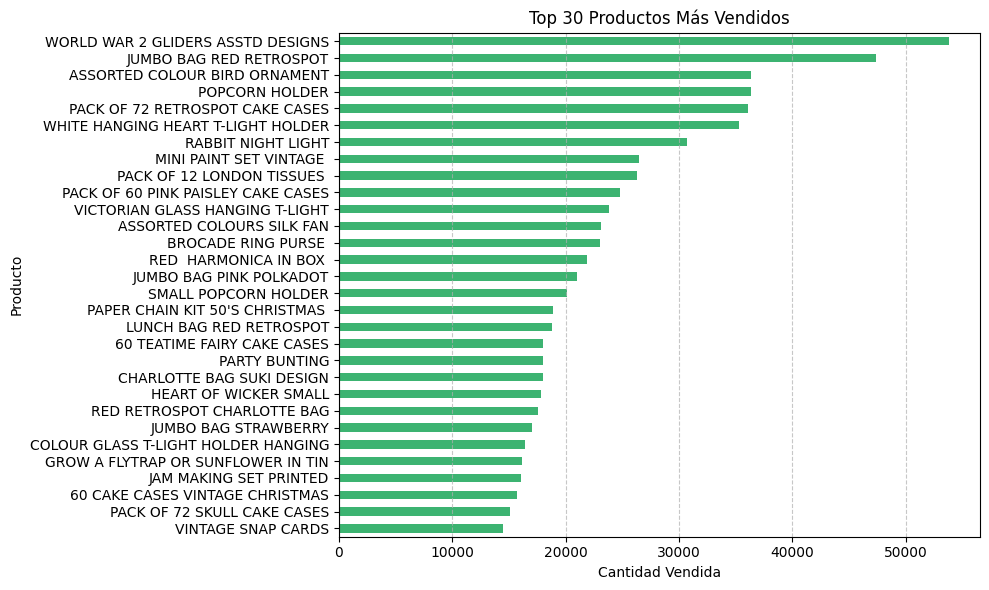

In [38]:
# Agrupar por producto y sumar cantidad vendida
productos_mas_vendidos = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Seleccionar top 30
top = productos_mas_vendidos.head(30)

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
top.plot(kind='barh', color='mediumseagreen')
plt.title('Top 30 Productos Más Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.gca().invert_yaxis()  # Invertir para que el más vendido esté arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Los primeros lugares entre los productos mas vendidos (los aviones a escala de la segunda guerra mundial como moda) nos pueden mostrar una tendencia de la clientela hacia productos de un estilo retro, ya sea con fines decorativos, coleccionables o regalo.

(entre 2010 y 2011)

3. Diferencias entre países

Creamos tabla de frecuencia

In [87]:
# Excluir Reino Unido (United Kingdom) del DataFrame
data_sin_uk = data[data['Country'] != 'United Kingdom']

# Calcular las ventas totales por país (excluyendo UK)
ventas_por_pais_sin_uk = data_sin_uk.groupby('Country')['TotalPrice'].sum()

# Calcular la frecuencia de cada país (excluyendo UK)
frecuencia_pais_sin_uk = data_sin_uk['Country'].value_counts()

# Calcular la frecuencia relativa (porcentaje) (excluyendo UK)
frecuencia_relativa_sin_uk = (frecuencia_pais_sin_uk / frecuencia_pais_sin_uk.sum()) * 100

# Crear una tabla combinada con ventas totales, frecuencia y frecuencia relativa
tabla_ventas_frecuencia_sin_uk = pd.DataFrame({
    'Ventas Totales': ventas_por_pais_sin_uk,
    'Frecuencia': frecuencia_pais_sin_uk,
    'Frecuencia Relativa (%)': frecuencia_relativa_sin_uk
})

# Mostrar la tabla combinada, ordenada por ventas totales (de mayor a menor)
print("\nTabla de Ventas, Frecuencia y Frecuencia Relativa por País (sin UK):")
tabla_ventas_frecuencia_sin_uk.sort_values(by='Ventas Totales', ascending=False).head(20)



Tabla de Ventas, Frecuencia y Frecuencia Relativa por País (sin UK):


,Ventas Totales,Frecuencia,Frecuencia Relativa (%)
Country,,,
Netherlands,284661.54,2371,5.106502
EIRE,263276.82,8196,17.652000
Germany,221698.21,9495,20.449700
France,197403.90,8557,18.429498
Australia,137077.27,1259,2.711550
Switzerland,56385.35,2002,4.311774
Spain,54774.58,2533,5.455407
Belgium,40910.96,2069,4.456075
Sweden,36595.91,462,0.995025


Buscamos top 20 países

Top 20 Países con Mayor Valor de Compras (Después de UK)
Country
Netherlands        284661.54
EIRE               263276.82
Germany            221698.21
France             197403.90
Australia          137077.27
Switzerland         56385.35
Spain               54774.58
Belgium             40910.96
Sweden              36595.91
Japan               35340.62
Norway              35163.46
Portugal            29367.02
Finland             22326.74
Channel Islands     20086.29
Denmark             18768.14
Italy               16890.51
Cyprus              12946.29
Austria             10154.32
Hong Kong           10117.04
Singapore            9120.39
Name: TotalPrice, dtype: float64


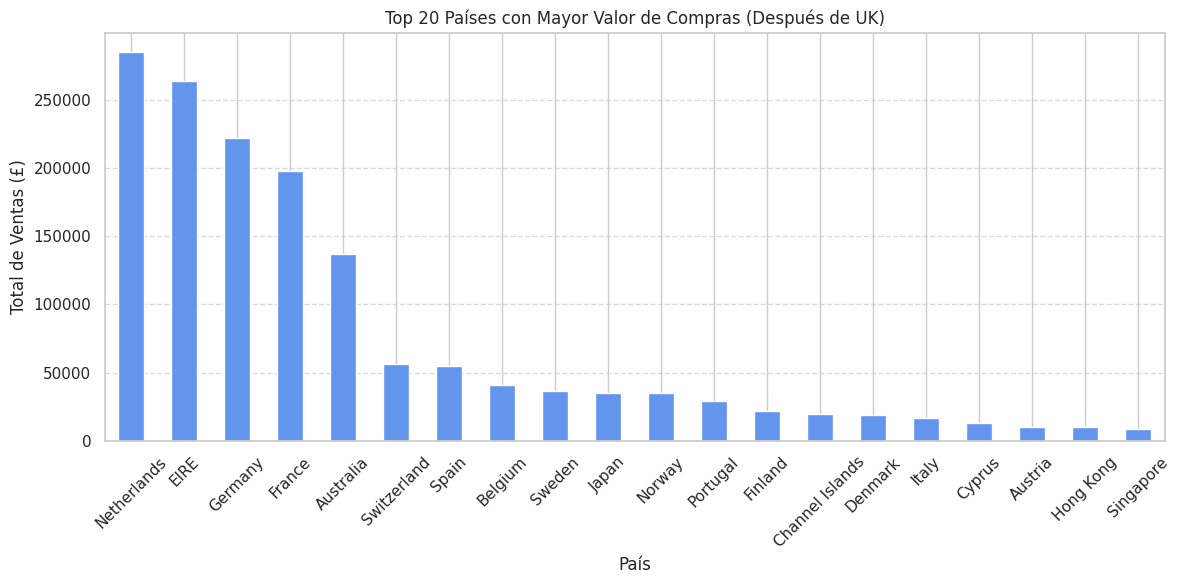

In [85]:
# Calcular el total de ventas por fila
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Agrupar por país y sumar el total de ventas
ventas_por_pais = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# (Opcional) excluir Reino Unido para enfocarnos en otros países
ventas_sin_uk = ventas_por_pais.drop('United Kingdom')

# Mostrar los 10 países con más ventas
print("Top 20 Países con Mayor Valor de Compras (Después de UK)")
print(ventas_sin_uk.head(20))

# Gráfico de barras
plt.figure(figsize=(12, 6))
ventas_sin_uk.head(20).plot(kind='bar', color='cornflowerblue')
plt.title('Top 20 Países con Mayor Valor de Compras (Después de UK)')
plt.xlabel('País')
plt.ylabel('Total de Ventas (£)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


La mayor concentración de dinero recaudado por ventas (fuera de Reino Unido) encuentra principalmente en Países Bajos, Irlanda, Alemania, Francia y Australia. Estos serian los mercados más fuertes despues del Reino Unido.

Algo que tambien cabe destacar que es mas probable que se haga una compra a Alemania (20.45% aprox. en frecuencia relativa porcentual) que a los Países bajos (5.11% aprox. en frecuencia relativa porcentual), aunque este otro tenga una recaudacion mayor, esto puede deberse a que en alemania se compra una cantidad mayor de productos pero productos mas baratos o menor cantidad de productos por ticket.

(entre 2010 y 2011)

4. Comportamiento temporal de las compras.

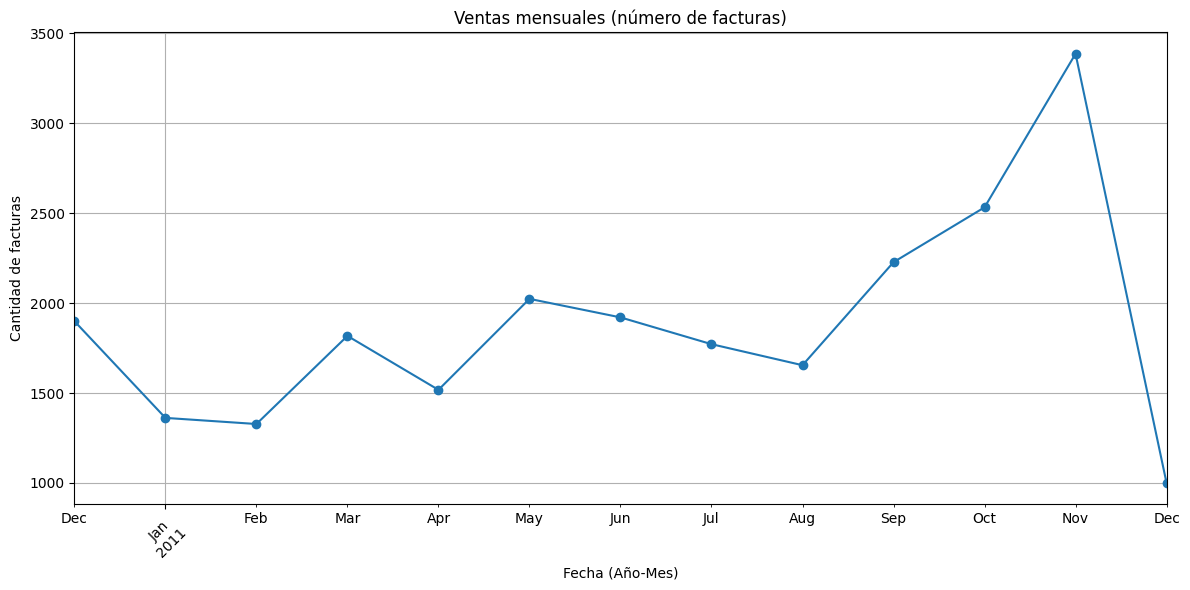

In [41]:
# Asegurarse de que InvoiceDate esté en formato datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Crear una nueva columna con año y mes
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

# Agrupar por año y mes, contando la cantidad de facturas únicas
ventas_mensuales = data.groupby('YearMonth')['InvoiceNo'].nunique()

# Graficar el comportamiento mensual
ventas_mensuales.plot(kind='line', marker='o', figsize=(12,6), title='Ventas mensuales (número de facturas)')
plt.ylabel('Cantidad de facturas')
plt.xlabel('Fecha (Año-Mes)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
ultima_fecha = data['InvoiceDate'].max()
print(f"Última fecha del dataset: {ultima_fecha}")

Última fecha del dataset: 2011-12-09 12:50:00


Teniendo en cuenta que la última fecha registrada en el dataset es el 9 de diciembre de 2011, podemos observar un aumento significativo en la cantidad de ventas durante los meses cercanos a diciembre, con un peak al llegar este mes.

Esto puede sugerir que existe una relacion proporcional entre la fecha y la cantidad de ventas, pero sucede algo:

In [48]:
# Asegurarse de que 'InvoiceDate' esté en formato datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Agrupar por mes y calcular ventas totales
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')
ventas_mensuales = data.groupby('YearMonth')['TotalPrice'].sum().reset_index()

# Convertir fechas a valores numéricos para regresión
ventas_mensuales['MonthIndex'] = np.arange(len(ventas_mensuales))

corr, p_value = pearsonr(ventas_mensuales['MonthIndex'], ventas_mensuales['TotalPrice'])

print(f"Coeficiente de correlación: {corr:.3f}")
print(f"P-valor: {p_value:.4f}")

Coeficiente de correlación: 0.472
P-valor: 0.1036


-Coeficiente de correlación moderada, siendo este bastante menor a 1
 P-valor mayor a 0.05 lo que nos dice que la evidencia no es suficiente para encontrar una relación.

Ahora podemos ver que la relacion entre ambos datos no es realmente significativa y nos podriamos guiar con certeza para dar una prediccion real de que camino tomaran las ventas más adentro de diciembre sin considerar otros factores.